In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [180]:
df = pd.read_csv("Churn_Modelling.csv")

In [182]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [184]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [186]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9992,9993,15657105,Chukwualuka,726,Spain,Male,36.0,2,0.00,1,1.0,0.0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28.0,7,155060.41,1,1.0,0.0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29.0,2,0.00,2,0.0,0.0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [282]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,0.749750,0.545609,38.920184,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,96.633003,0.830539,0.497940,10.488004,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [190]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [192]:
df.shape

(10002, 14)

In [194]:
df.drop(columns=["RowNumber" , "CustomerId" , "Surname"] , inplace=True)

In [196]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [198]:
df.dropna(inplace=True)

In [200]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [202]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [204]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [206]:
df["Age"] = df["Age"].astype("int64")

# Encoding

In [209]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [211]:
en_data = [['France', 'Spain', 'Germany']]
en_data = OrdinalEncoder(categories=en_data)
df["Geography"] = en_data.fit_transform(df[["Geography"]])
df["Geography"] = df["Geography"].astype("int64")
df["Geography"].unique()

array([0, 1, 2], dtype=int64)

In [213]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [215]:
en_data = [['Female', 'Male']]
en_data = OrdinalEncoder(categories=en_data)
df["Gender"] = en_data.fit_transform(df[["Gender"]])
df["Gender"] = df["Gender"].astype("int64")
df["Gender"].unique()

array([0, 1], dtype=int64)

# After EnCoding

In [218]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1.0,1.0,101348.88,1
1,608,1,0,41,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39,1,0.00,2,0.0,0.0,93826.63,0
5,645,1,1,44,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,0,0,36,7,0.00,1,0.0,1.0,42085.58,1
9998,772,2,1,42,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,2,1,42,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,0,0,28,4,130142.79,1,1.0,0.0,38190.78,0


# Correlation

<Axes: >

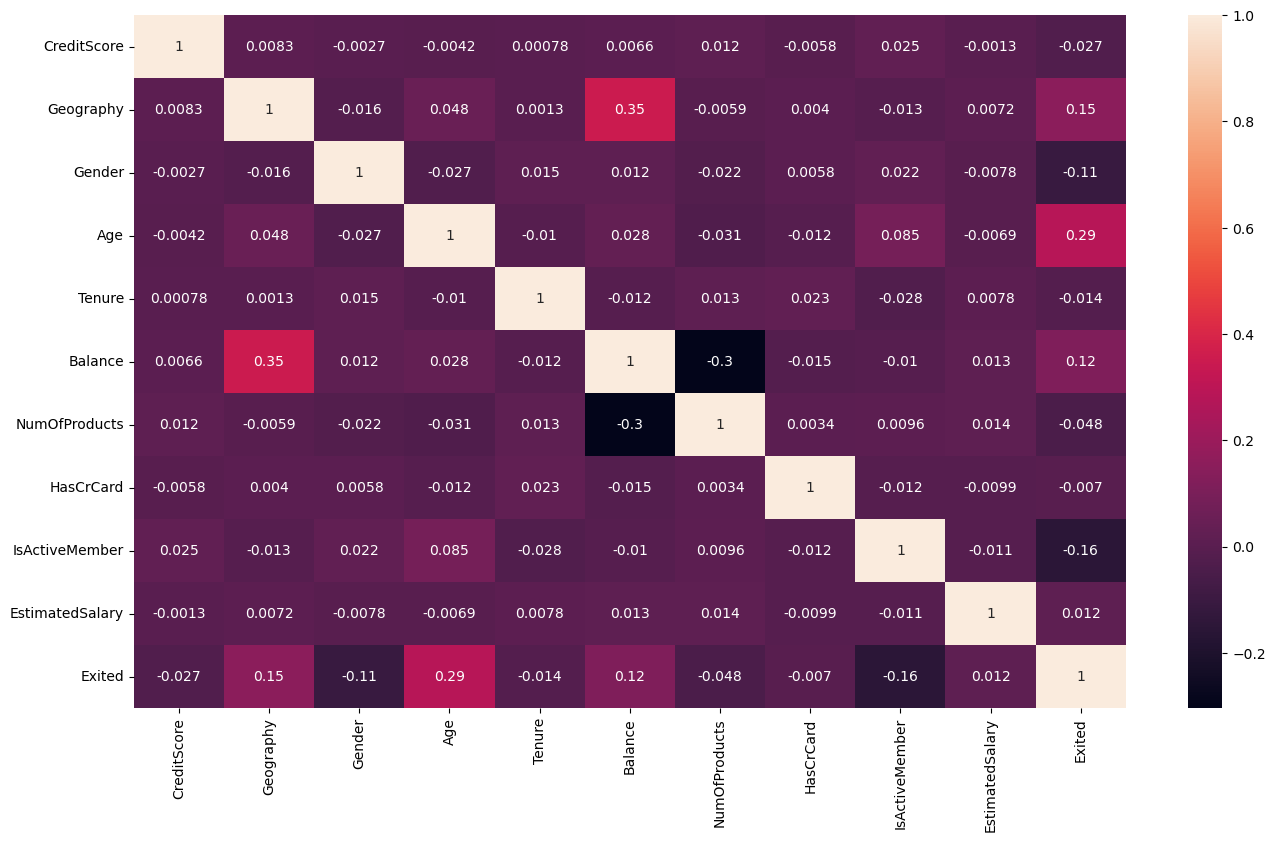

In [221]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [222]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [225]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1.0,1.0,101348.88
1,608,1,0,41,1,83807.86,1,0.0,1.0,112542.58
2,502,0,0,42,8,159660.80,3,1.0,0.0,113931.57
3,699,0,0,39,1,0.00,2,0.0,0.0,93826.63
5,645,1,1,44,8,113755.78,2,1.0,0.0,149756.71
...,...,...,...,...,...,...,...,...,...,...
9997,709,0,0,36,7,0.00,1,0.0,1.0,42085.58
9998,772,2,1,42,3,75075.31,2,1.0,0.0,92888.52
9999,772,2,1,42,3,75075.31,2,1.0,0.0,92888.52
10000,792,0,0,28,4,130142.79,1,1.0,0.0,38190.78


In [227]:
y = df["Exited"]
y

0        1
1        0
2        1
3        0
5        1
        ..
9997     1
9998     1
9999     1
10000    0
10001    0
Name: Exited, Length: 9998, dtype: int64

# Train Test Split

In [230]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=0)

# Standard Scaler

In [233]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# Model : Logistic Regression

In [236]:
model1 = LogisticRegression()

In [238]:
model1.fit(x_train , y_train)

LogisticRegression()

In [240]:
y_pred = model1.predict(x_test)

In [242]:
print("Test accuracy Score :- ",round(model1.score(x_test,y_test)*100,2),"%") 
print("Train accuracy Score :- ",round(model1.score(x_train,y_train)*100,2),"%")

Test accuracy Score :-  81.05 %
Train accuracy Score :-  81.32 %


In [244]:
ps = precision_score(y_test , y_pred)
rs = recall_score(y_test , y_pred)
f1 = f1_score(y_pred,y_test)

print(f"""
            Logistic Regression - precision_score :- {ps}
            Logistic Regression - recall_score    :- {rs}
            Logistic Regression - f1_score       :- {f1}
          """)


            Logistic Regression - precision_score :- 0.648854961832061
            Logistic Regression - recall_score    :- 0.20334928229665072
            Logistic Regression - f1_score       :- 0.30965391621129323
          


In [246]:
print(confusion_matrix(y_test,y_pred))

[[1536   46]
 [ 333   85]]


# Model : K_Neighbors Classifier

In [249]:
model2 = KNeighborsClassifier(n_neighbors=18)
model2.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=18)

In [251]:
print("Test accuracy Score :- ",round(model2.score(x_test,y_test)*100,2),"%") 
print("Train accuracy Score :- ",round(model2.score(x_train,y_train)*100,2),"%")

Test accuracy Score :-  83.2 %
Train accuracy Score :-  84.71 %


In [252]:
y_pred2 = model2.predict(x_test)

In [253]:
ps = precision_score(y_test , y_pred2)
rs = recall_score(y_test , y_pred2)
f1 = f1_score(y_pred2,y_test)

print(f"""
            KNN Classifier - precision_score :- {ps}
            KNN Classifier - recall_score    :- {rs}
            KNN Classifier - f1_score        :- {f1}
          """)


            KNN Classifier - precision_score :- 0.777027027027027
            KNN Classifier - recall_score    :- 0.2751196172248804
            KNN Classifier - f1_score        :- 0.40636042402826855
          


In [254]:
print(confusion_matrix(y_test,y_pred2))

[[1549   33]
 [ 303  115]]


# Model : Random Forest Classifier

In [256]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [257]:
print("Test accuracy Score :- ",round(model3.score(x_test,y_test)*100,2),"%") 

Test accuracy Score :-  85.9 %


In [259]:
y_pred3 = model3.predict(x_test)

In [262]:
ps = precision_score(y_test , y_pred3)
rs = recall_score(y_test , y_pred3)
f1 = f1_score(y_pred3,y_test)

print(f"""
            Random Forest Classifier - precision_score :- {ps}
            Random Forest Classifier - recall_score    :- {rs}
            Random Forest Classifier - f1_score        :- {f1}
          """)


            Random Forest Classifier - precision_score :- 0.765625
            Random Forest Classifier - recall_score    :- 0.4688995215311005
            Random Forest Classifier - f1_score        :- 0.5816023738872403
          


In [264]:
print(confusion_matrix(y_test,y_pred3))

[[1522   60]
 [ 222  196]]


# Perform the comparative analysis between the models and select the best model. 
the reason why you are selecting the model.

Overall, Random Forest Classifier provides the best performance in terms of precision, recall, and F1 score

In [276]:
import joblib

joblib.dump(model3, r"C:\\Users\\Anish Avasthi\\Desktop\\Sunstone\\random_for_BankCustomer.pkl")

['C:\\\\Users\\\\Anish Avasthi\\\\Desktop\\\\Sunstone\\\\random_for_BankCustomer.pkl']